In [144]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf


In [145]:
# Read csv file
data = pd.read_csv('/content/drive/MyDrive/SHRDC_deep_learning/project/breast_cancer_wisconsin_(diagnostic)_kaggle/breat_cancer_wisconsin_kaggle.csv')

In [146]:
# Visualize first 5 rows of the dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
# Check for null values
data.isna().sum()
# Found 1 column with null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [148]:
# Check if there's any other non null values in the column
data[data['Unnamed: 32'].notnull()]
# There's no other values than null in the column

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [149]:
# Drop the 'Unnamed: 32' column
data = data.drop(columns=['Unnamed: 32'])

In [150]:
# Analyse the features and we can drop if there's any features that are irrelevant
print(data.columns)
# We are going to drop id column as its irrelevant

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [151]:
data = data.drop(columns=['id'])

In [152]:
# Split features and labels dataset
features = data.drop(columns=['diagnosis'])
labels = data['diagnosis']

In [153]:
# Get dummies for labels
labels = pd.get_dummies(labels, drop_first=True)

In [154]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

SEED=12345
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,random_state=SEED)

In [155]:
# Data preparation
standardizer = sklearn.preprocessing.StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_test = standardizer.transform(x_test)


In [156]:
# Model creation
# There are some regulization been added to overcome overfitting
nClass = len(np.unique(y_test))
l2_reg = tf.keras.regularizers.L2(0.07)
inputs = tf.keras.Input(shape=(x_train.shape[-1],))

dense = tf.keras.layers.Dense(64,activation='relu')
x = dense(inputs)
dense = tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=l2_reg)
x = dense(x)
dense = tf.keras.layers.Dense(16,activation='relu',kernel_regularizer=l2_reg)
x = dense(x)
outputs = tf.keras.layers.Dense(nClass,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs,name='tbreast_cancer_wisconsin')
model.summary()

Model: "tbreast_cancer_wisconsin"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_49 (Dense)            (None, 64)                1984      
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 2)                 34        
                                                                 
Total params: 4,626
Trainable params: 4,626
Non-trainable params: 0
_________________________________________________________________


In [157]:
#Compile and train the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=16,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 4.3534 - accuracy: 0.8945 - val_loss: 3.7889 - val_accuracy: 0.8713
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 3.2861 - accuracy: 0.9472 - val_loss: 2.8906 - val_accuracy: 0.9240
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 2.4903 - accuracy: 0.9598 - val_loss: 2.2054 - val_accuracy: 0.9357
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 1.8929 - accuracy: 0.9698 - val_loss: 1.6825 - val_accuracy: 0.9532
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 1.4434 - accuracy: 0.9749 - val_loss: 1.2929 - val_accuracy: 0.9591
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 1.1053 - accuracy: 0.9749 - val_loss: 1.0001 - val_accuracy: 0.9708
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.8527 - accuracy: 0.9774 - val_loss: 0.7830 - val_accuracy: 0.9766
Epoch 8/25
25/25 [=

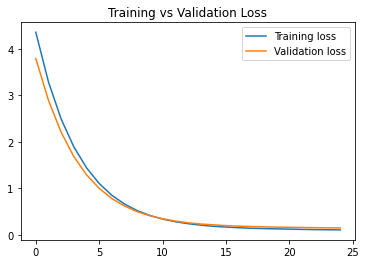

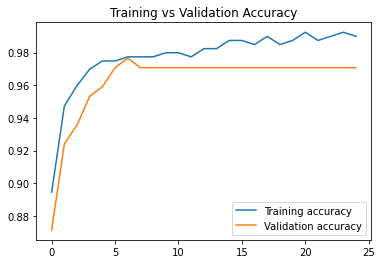

<Figure size 432x288 with 0 Axes>

In [158]:
# Plot the training and validation accuracy
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = history.epoch

plt.plot(epochs,training_loss,label='Training loss',)
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.figure()

plt.plot(epochs,training_accuracy,label='Training accuracy')
plt.plot(epochs,val_accuracy,label='Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.figure()

plt.show()